In [1]:
import pandas as pd
A= pd.read_csv("C:/Users/Pranita/DL_P/Notebooks/DATA/housing.csv")

In [2]:
A.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
A.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
A.corr()[["median_house_value"]]

,median_house_value
longitude,-0.045967
latitude,-0.144160
housing_median_age,0.105623
total_rooms,0.134153
total_bedrooms,0.049686
population,-0.024650
households,0.065843
median_income,0.688075
median_house_value,1.000000


In [6]:
#missingg value treatment

from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy="mean")
A[["total_bedrooms"]]=si.fit_transform(A[["total_bedrooms"]])

In [7]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
import matplotlib.pyplot as plt
import seaborn as sb

In [9]:
A["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

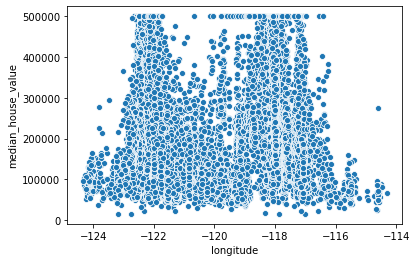

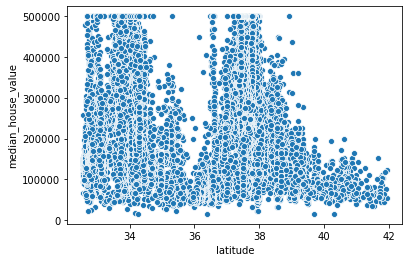

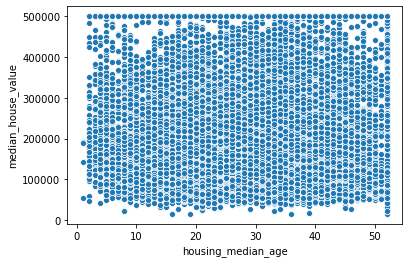

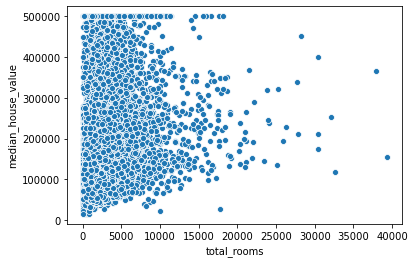

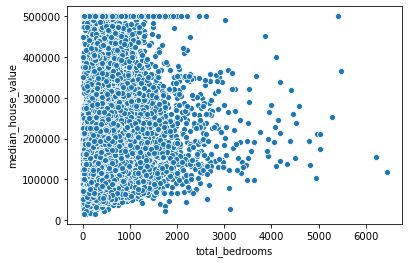

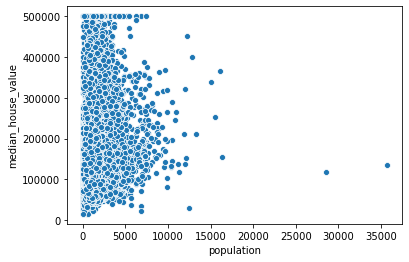

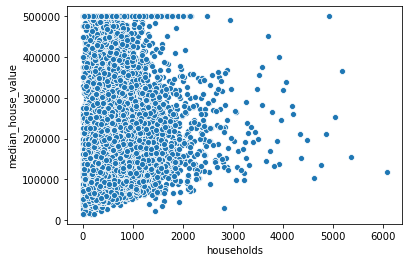

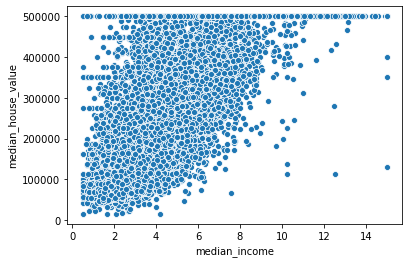

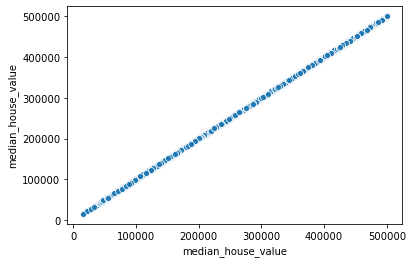

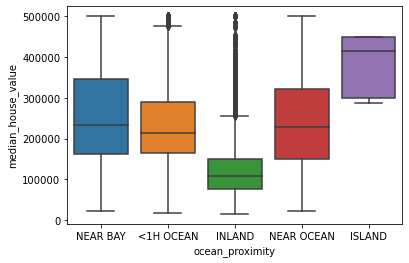

In [10]:
#EDA
for i in A.columns:
    if (A[i].dtype=="float64"):
        sb.scatterplot(A[i],A.median_house_value)
        plt.show()
    else:
        sb.boxplot(A[i],A.median_house_value)
        plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Z=pd.get_dummies(A[["ocean_proximity"]])
#A[["ocean_proximity"]]=pd.DataFrame(le.fit_transform(A.ocean_proximity))

In [12]:
Z

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [13]:
# removing unnecessary features

X=A.drop(labels=["median_house_value","ocean_proximity","households"],axis=1)
X=X.join(Z)
y=A[["median_house_value"]]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=20)

In [14]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtest)

In [15]:
from sklearn.metrics import accuracy_score,explained_variance_score,mean_squared_error,mean_absolute_error
#print(accuracy_score(ytest,pred))
print(explained_variance_score(ytest,pred))
print(mean_squared_error(ytest,pred))
print(mean_absolute_error(ytest,pred))

0.6376414399461633
5056626216.222493
50830.93100998185


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,Lasso
lrr=Ridge()
ll=Lasso()

tp={"alpha":list(range(2,100,1))}
cv=GridSearchCV(lrr,tp,scoring="neg_mean_squared_error",cv=4)
cvmodel=cv.fit(xtrain,ytrain)

In [17]:
cvmodel.best_params_

{'alpha': 2}

In [18]:
lrr_alpha=Ridge(alpha=2)
model_lrr=lrr_alpha.fit(xtrain,ytrain)
pred=model.predict(xtest)

print(explained_variance_score(ytest,pred))
print(mean_squared_error(ytest,pred))
print(mean_absolute_error(ytest,pred))

0.6376414399461633
5056626216.222493
50830.93100998185


In [19]:
tp={"alpha":list(range(2,100,1))}
cv=GridSearchCV(ll,tp,scoring="neg_mean_squared_error",cv=4)
cvmodel=cv.fit(xtrain,ytrain)

C:\Users\Pranita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 972516178742.1797, tolerance: 16278664709.973278
  model = cd_fast.enet_coordinate_descent(
C:\Users\Pranita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 979824346823.7422, tolerance: 16446139088.01457
  model = cd_fast.enet_coordinate_descent(
C:\Users\Pranita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 988299424796.7812, tolerance: 16296309508.118532
  model = cd_fast.enet_coordinate_descent(
C:\Users\Pranita\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Converg

In [20]:
cvmodel.best_params_

{'alpha': 11}

In [22]:
ll_alpha=Lasso(alpha=11)
model_ll=ll_alpha.fit(xtrain,ytrain)
pred=model.predict(xtest)

print(explained_variance_score(ytest,pred))
print(mean_squared_error(ytest,pred))
print(mean_absolute_error(ytest,pred))

0.6376414399461633
5056626216.222493
50830.93100998185


In [24]:
model_ll.coef_

array([-2.88542567e+04, -2.74530087e+04,  1.06848298e+03, -3.39789577e+00,
        1.30170641e+02, -3.77836941e+01,  3.82553795e+04,  0.00000000e+00,
       -3.93187890e+04,  9.54134815e+04, -5.15211930e+03,  2.17671304e+03])